In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [49]:
# from google.colab import drive
# drive.mount('/content/drive')

### Data Preprocessing

In [50]:
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/Ethical'

In [51]:
data0 = pd.read_csv(ROOT_PATH+'urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [52]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [53]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

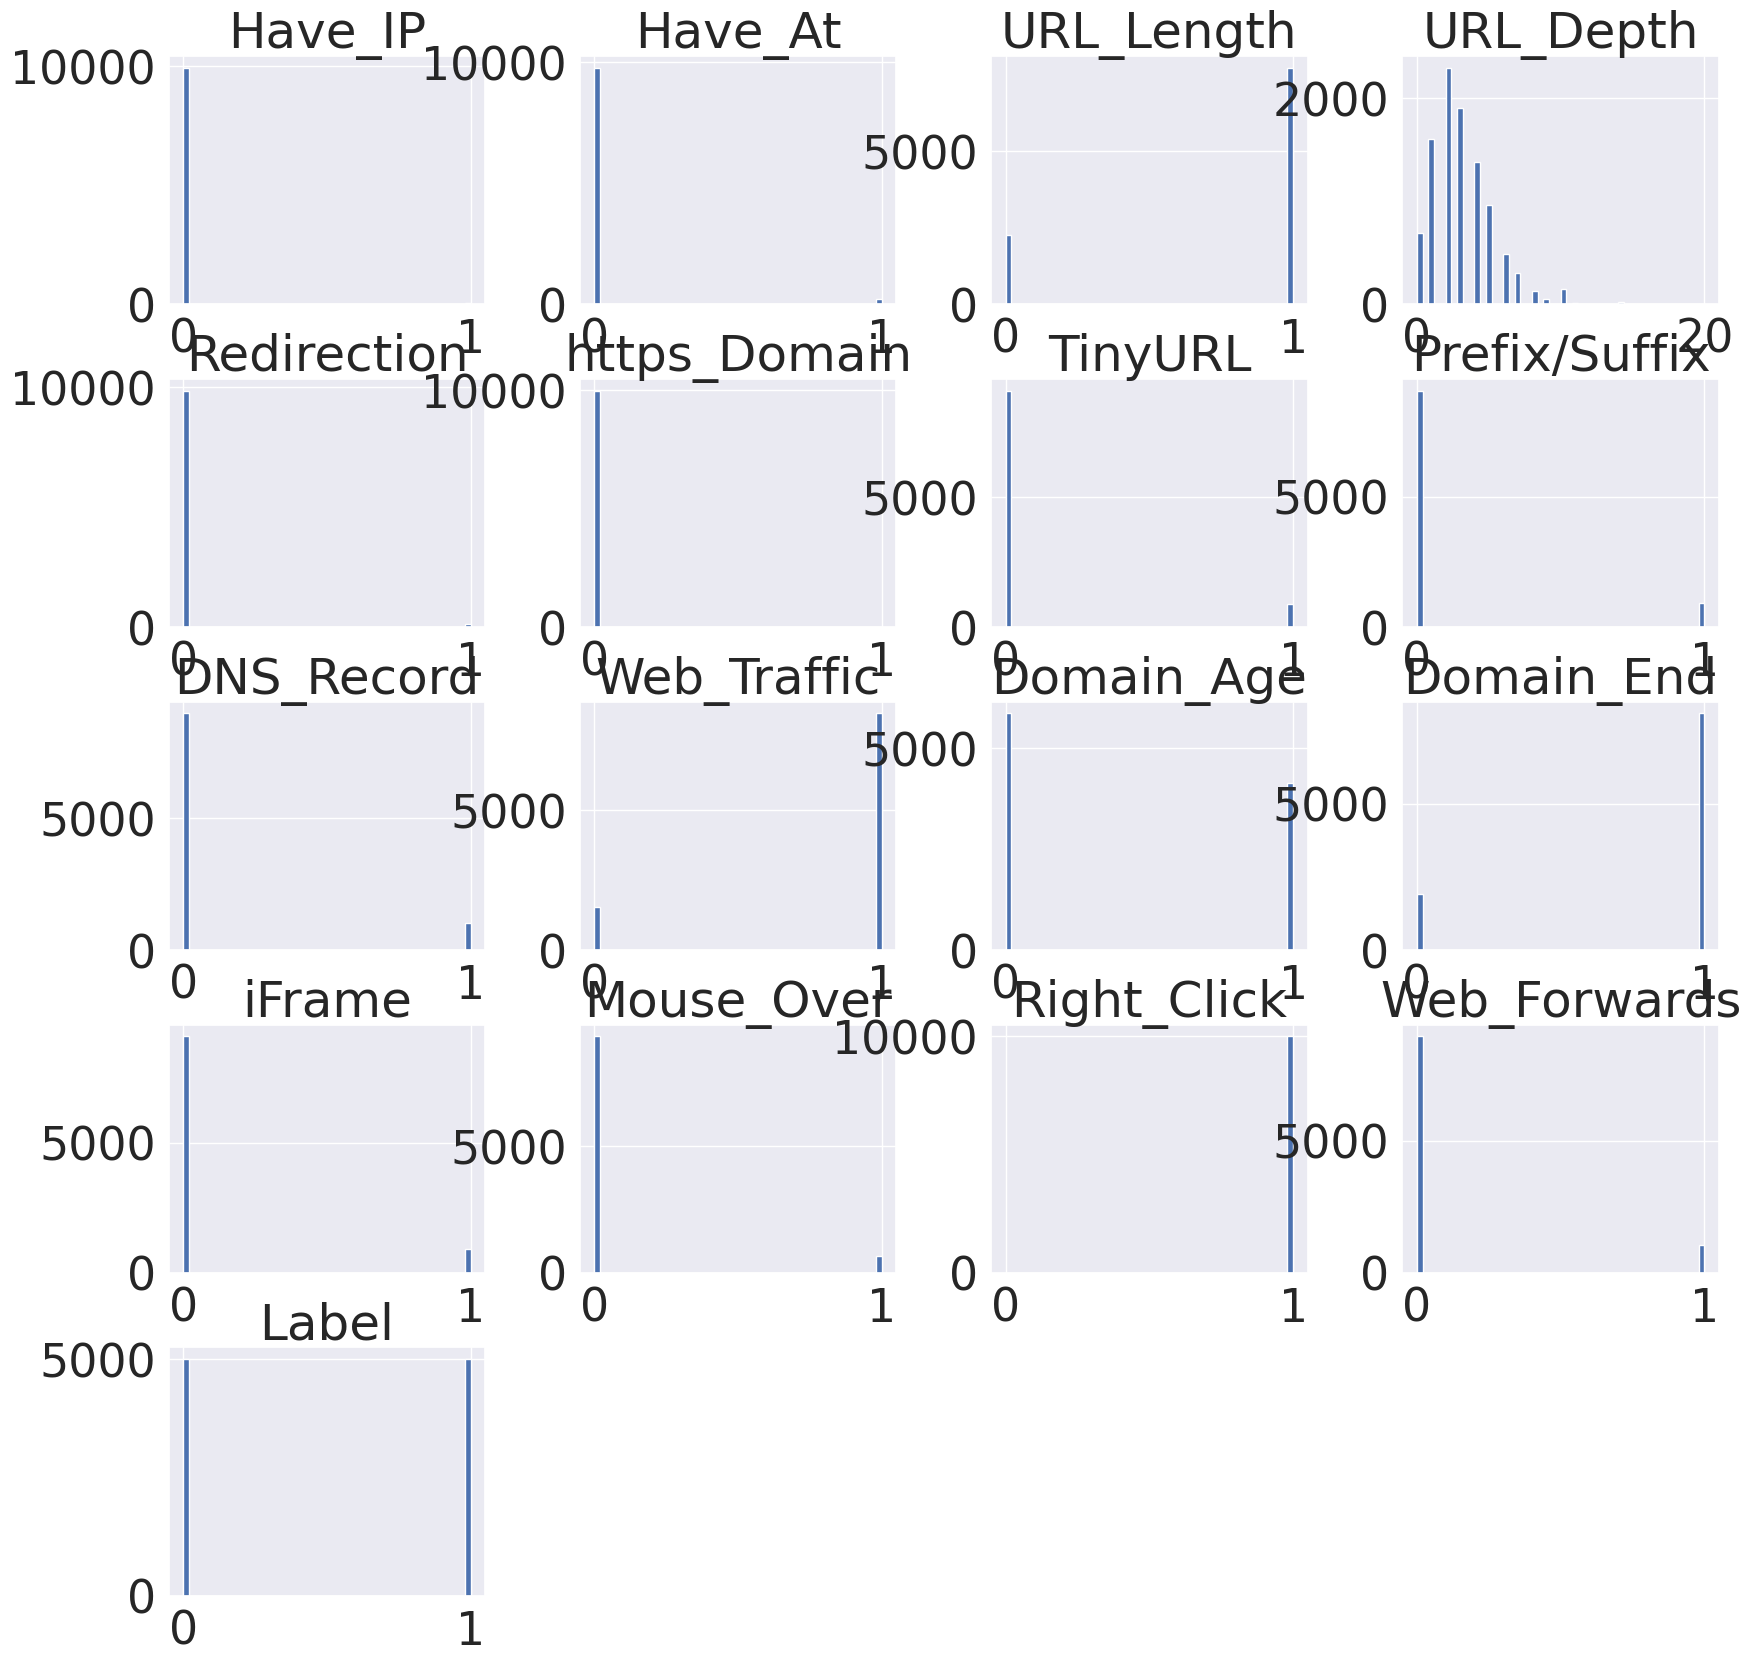

In [54]:
data0.hist(bins = 50,figsize = (20,20))
plt.show()

<ipython-input-55-7a81b67b0a9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data0.corr())


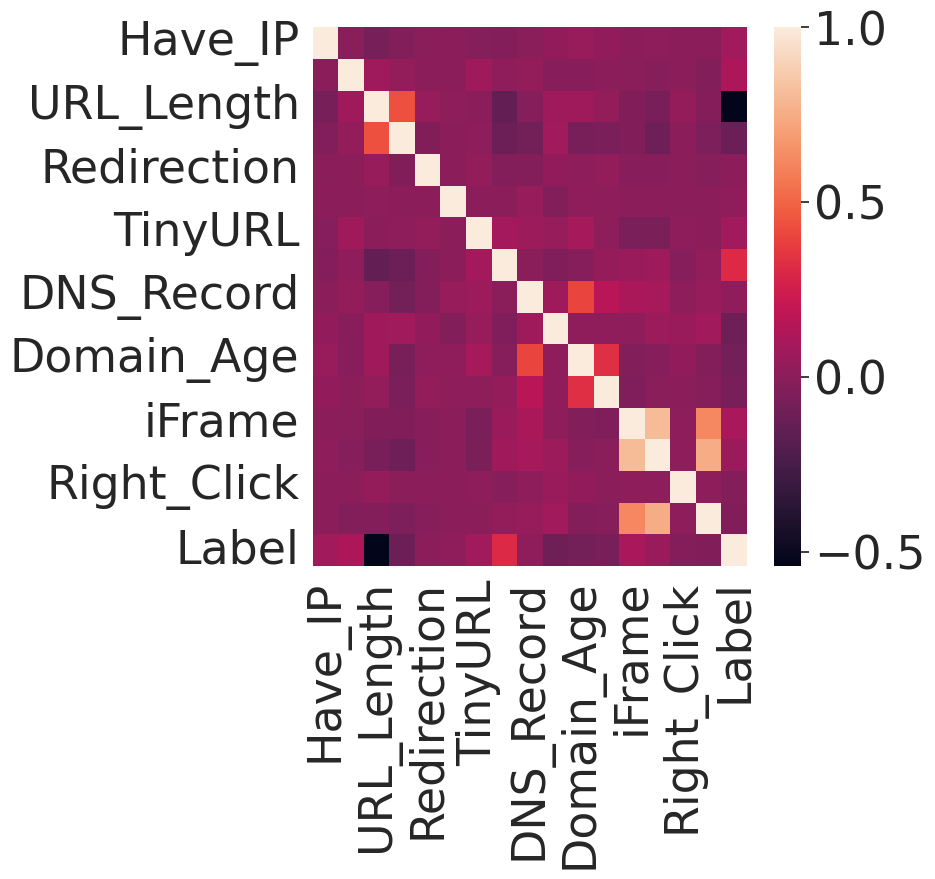

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(data0.corr())
plt.show()

In [56]:
data = data0.drop(['Domain'], axis = 1).copy()

In [57]:
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [58]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,1,4,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,6,0,0,0,0,0,1,0,1,1,1,1,1,1


#### Train & Test data

In [59]:
y = data['Label']
X = data.drop(['Label', 'Web_Traffic'],axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

In [60]:
X.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0
1,0,0,1,3,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,4,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,6,0,0,0,0,0,0,1,1,1,1,1


### Helper Functions

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [62]:
import pickle

In [63]:
def generate_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  c_report = classification_report(y_test, y_pred)
  print(c_report)
  ax = plt.subplot()
  sns.set(font_scale=3.0) # Adjust to fit
  sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  

  label_font = {'size':'18'}  # Adjust to fit
  ax.set_xlabel('Predicted labels', fontdict=label_font);
  ax.set_ylabel('True labels', fontdict=label_font);

  ax.set_title('Confusion Matrix', fontdict=label_font);

  ax.xaxis.set_ticklabels(['Real', 'Fake']);
  ax.yaxis.set_ticklabels(['Real', 'Fake']);
  plt.figure(figsize=(8,8))
  plt.show()

In [64]:
ML_Model = []
acc_test = []

#function to call for storing the results
def storeResults(model, a):
  ML_Model.append(model)
  acc_test.append(round(a, 3))

In [65]:
def save_model(model, file_name):
  with open(ROOT_PATH+'/'+file_name, 'wb') as handle:
    pickle.dump(model, handle)

In [66]:
def load_model(file_name):
  with open(ROOT_PATH + '/models/'+file_name, 'rb') as handle:
    model = pickle.load(handle)
  return model

### 1. RandomForest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
     

Random forest: Accuracy on training Data: 0.809
Random forest: Accuracy on test Data: 0.807


In [68]:
save_model(forest, "models/random_forest.pkl")

In [69]:
t_forest = load_model('random_forest.pkl')

In [70]:
forest == t_forest

False

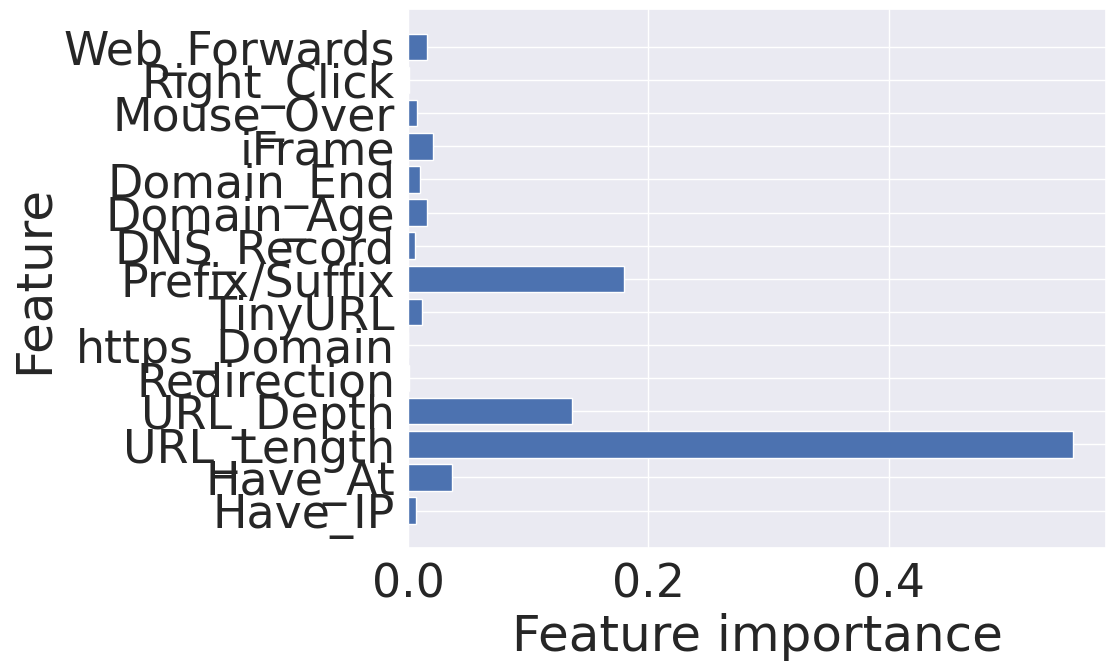

In [71]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [72]:
storeResults('Random Forest', acc_test_forest)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       982
           1       0.98      0.63      0.77      1018

    accuracy                           0.81      2000
   macro avg       0.85      0.81      0.80      2000
weighted avg       0.86      0.81      0.80      2000



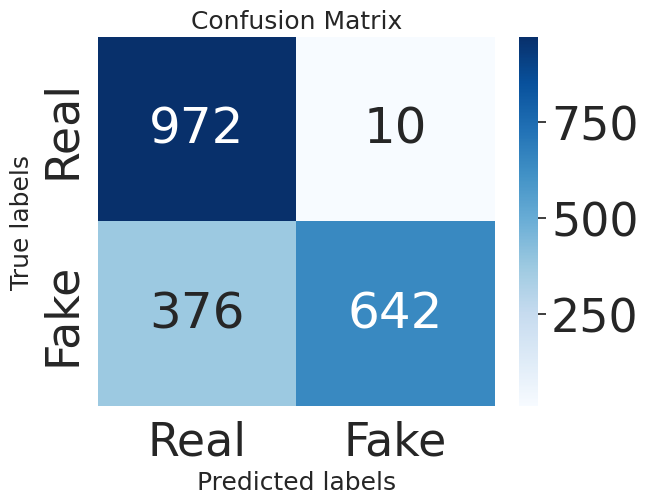

<Figure size 800x800 with 0 Axes>

In [73]:
generate_confusion_matrix(y_test, y_test_forest)

### 2. Multilayer Perception

In [74]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
mlp.fit(X_train, y_train)
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [75]:
save_model(mlp, '/models/mlp.pkl')

In [76]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Accuracy on training Data: 0.852
Multilayer Perceptrons: Accuracy on test Data: 0.849


In [77]:
storeResults('Multilayer Perceptrons', acc_test_mlp)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       982
           1       0.93      0.76      0.84      1018

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



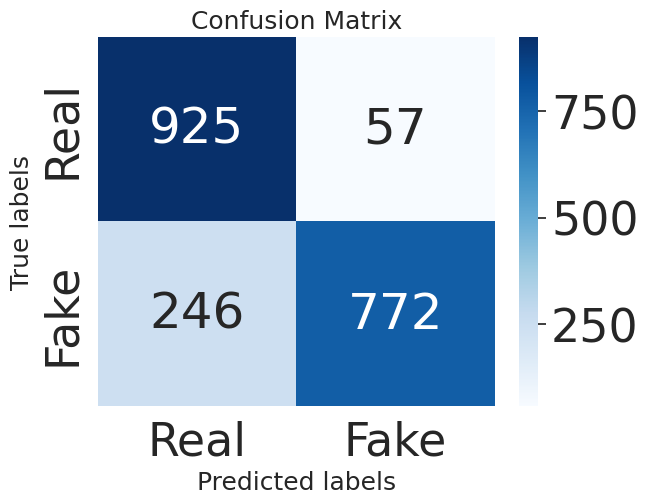

<Figure size 800x800 with 0 Axes>

In [78]:
generate_confusion_matrix(y_test, y_test_mlp)

### 3. XGBClassifier

In [79]:
from xgboost import XGBClassifier

# Instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model
xgb.fit(X_train, y_train)

y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [80]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.856
XGBoost : Accuracy on test Data: 0.847


In [81]:
save_model(xgb, "models/xgb.pkl")

In [82]:
storeResults('XGBoost',  acc_test_xgb)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       982
           1       0.92      0.77      0.84      1018

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



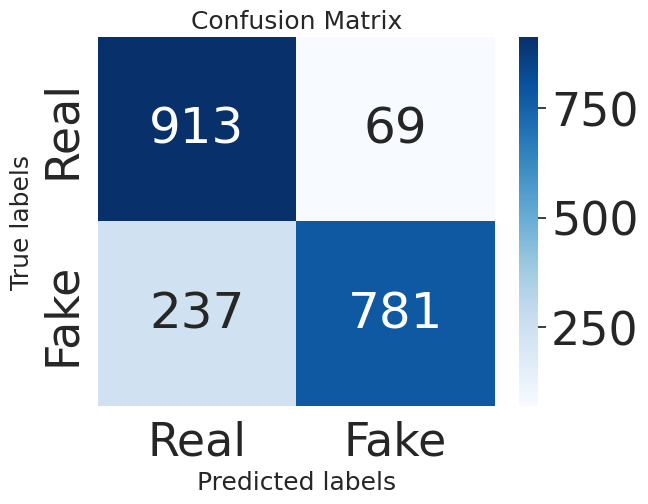

<Figure size 800x800 with 0 Axes>

In [83]:
generate_confusion_matrix(y_test, y_test_xgb)

### 4. Support Vector Machines

In [84]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [85]:
save_model(svm, "models/svm.pkl")

In [86]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [87]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.803
SVM : Accuracy on test Data: 0.797


In [88]:
storeResults('SVM', acc_test_svm)

              precision    recall  f1-score   support

           0       0.71      0.98      0.83       982
           1       0.97      0.62      0.76      1018

    accuracy                           0.80      2000
   macro avg       0.84      0.80      0.79      2000
weighted avg       0.84      0.80      0.79      2000



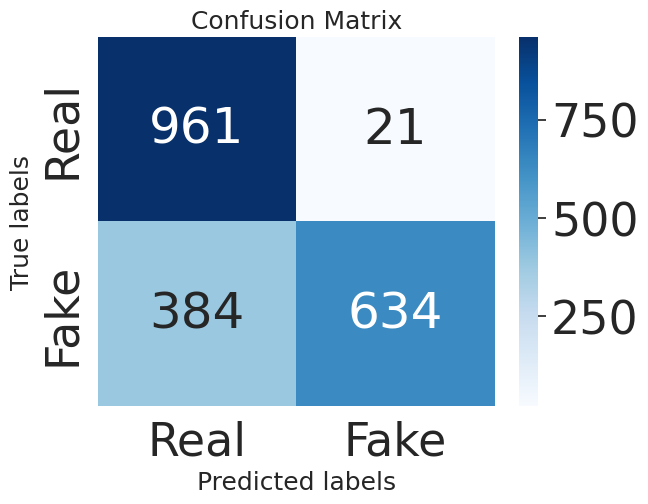

<Figure size 800x800 with 0 Axes>

In [89]:
generate_confusion_matrix(y_test, y_test_svm)

### Results

In [90]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Test Accuracy': acc_test})
results

,ML Model,Test Accuracy
0,Random Forest,0.807
1,Multilayer Perceptrons,0.848
2,XGBoost,0.847
3,SVM,0.798


In [91]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Test Accuracy
1,Multilayer Perceptrons,0.848
2,XGBoost,0.847
0,Random Forest,0.807
3,SVM,0.798


### Testing Model

In [105]:
i = 3566
data0.iloc[i].tolist(), X.iloc[i].tolist(), y[i]

(['distractify.com', 0, 0, 1, 10, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
 1)

0

In [95]:
ip = X.iloc[0].tolist() # [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
ip = np.array([ip])
print("length: ", len(ip))
print("data: ", ip)

length:  1
data:  [[0 0 1 1 0 0 0 0 0 1 1 0 0 1 0]]


In [96]:
y[0]

0

In [97]:
model = load_model('xgb.pkl')

In [98]:
print(model.predict(ip))

[0]
